# <font color = 'blue'>$$    BAKYTZHAN\;\; KURMANBEK $$</font>

#  <font color = 'red'>$$    MATH\;\; 449: Statistical\;\; Programming $$</font>
# <font color = 'navy'>$$    Assignment: Project \;\; 2 $$</font>

# <font color = 'purple'>**$$ Introduction $$**</font>    

This work is a natural ***continuation of the previous study - Project 1***. In Project 1, I had investigated the common belief about the giftedness of Asian children in science subjects. I had tested some hypotheses and concluded that population density plays a significant role in supporting this belief compared to budget per capita. This time, I will use <font color = 'navy'>***Deep Neural Networks***</font> to ***predict the ranking of the countries in IMO 2020***. 

It is a tradition for IMO Organizers to list the countries from best to the worst according to the performance of the country's team in IMO. Every year, the list is being updated and many countries need to go upward on that list since it can cause a positive view to enhance and enlarge the government spendings on the science. Also, it may build the international image of the country and competition with other countries may result in advancing the education system of the country. Thus, a ranking list of countries is a crucial target of my work. If I say from my personal interest, then the ranking lists of IMO are a structured way in comparing the performance of different generations, for me, it was a competition not only among my generation and there was a goal to overperform than from all previous participants from our country. Of course, I know we cannot compare them directly looking to the ranking, because the difficulties of problems and education systems of two generations may differ a lot. Therefore it would not be correct to say which one was better than others, however, if we restrict ourselves in looking to close generations (like 2-3 year difference) we may tell which generation performed well compared to another one. This was a motivation to study the ranking of the country in IMO given by information about how many golds, silver, bronze medals they won previously, etc. 

However, predicting the ranking of the country is not easy task since we can miss many important observed or unobserved variables. Some of the unobserved variables may be related to the historical background of the country and political stability, personal hardships and so on. Therefore, I have tried to collect some information about countries, and particularly, I have added the rankings of past 10 years into the account, since I believe there may be some trend in the performance of a country in a small amount of time (10 years is not too small, but we can rely on my sense of belief that the situation with a country would not significantly change in 10 years in most cases, consequently the performance should be more or less the same). I have parsed many IMO websites and found relative ranking efficiency percentage for each year participation of country, and the average value of the efficiency used to estimate the relative ranking of the country for those years where the country did not participate at all. Doing this way, we avoid some sampling error and may have some trusted results.  

Actually, the sample size is too small for doing deep learning since it may get overfit too quickly on such sample. Thus, I would normalize my all inputs and use some techniques learned from Coursera course like initialization, momentum, dropout methods and batch normalization. My variables would be all numerical variables (excluding females, since they contribute to small amount). Namely my variables: ***First Participation, Participations, All, Males, Dist, Avg.persis, Gold, Silver, Bronze, Honor Mention, Budget per capita($), population density (pop/km^2), ranking_2010, ..., ranking_2019.*** I will explain the process in details in every cell behind the codes and in the end, I will summarize all the obtained results and make my conclusion. 

# <font color = 'purple'>**$$ Main \;\; Body $$**</font>

## ***We will import necessary variables***

In [1]:
#---------------------------------------------------------------Importing the necessary libraries-----------------------------------------------------------------------------------------#


import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing


## ***Looking into new file (dictionary) of IMO dataset***. 

*   I have added variables from ***ranking_2010*** to ***ranking_2019.***

In [2]:
#----------------------------------------------------------------------Looking to the data-------------------------------------------------------------------------------------------------#


df = pd.read_csv('../input/imo-dictionary/imo_dict_new.csv')
df.head(20)

,Code,Country,First Participation,Participations,All,Males,Females,Dist,Avg.persis,Gold,...,Ranking_2012,Ranking_2013,Ranking_2014,Ranking_2015,Ranking_2016,Ranking_2017,Ranking_2018,Ranking_2019,Ranking_2020,Continent
0,ALB,Albania,1993,23,125,95.0,30.0,86,1.45,0,...,77,75,77,77,69,76,79,80,77,Europe
1,ALG,Algeria,1977,19,92,45.0,6.0,86,1.06,0,...,84,82,85,62,82,73,92,77,100,Africa
2,AGO,Angola,2019,1,2,2.0,NaN,2,1.00,0,...,98,95,99,102,107,109,105,110,103,Africa
3,ARG,Argentina,1988,32,189,174.0,15.0,117,1.61,6,...,54,67,56,52,57,26,39,53,50,South America
4,ARM,Armenia,1993,28,165,104.0,5.0,102,1.61,1,...,47,40,39,26,30,41,32,49,37,Asia
5,AUS,Australia,1981,40,240,224.0,16.0,180,1.33,24,...,27,15,11,6,25,34,11,18,8,Australia
6,AUT,Austria,1970,50,320,300.0,20.0,212,1.50,13,...,50,48,51,60,46,70,57,60,65,Europe
7,AZE,Azerbaijan,1993,27,154,154.0,0.0,101,1.52,0,...,61,52,61,48,54,42,69,51,65,Asia
8,BAH,Bahrain,1990,3,18,5.0,1.0,18,1.00,0,...,88,86,89,92,96,98,94,99,93,Asia
9,BGD,Bangladesh,2005,16,87,78.0,9.0,47,1.85,1,...,54,61,53,33,35,26,41,67,38,Asia




*   ***Data Cleaning and changing the type of some data to float and integer.***
*   ***Looking to overall info about data***


In [3]:
#---------------------------------------------------------Converting and rewriting the object dtypes to float--------------------------------------------------------------------------------#
#---------------------------------------------------------------------Importing the data-----------------------------------------------------------------------------------------------------#


df = pd.read_csv('../input/imo-dictionary/imo_dict_new.csv')


#-----------------------------------------------------------------------Converting function---------------------------------------------------------------------------------------------------#


def convert_1(val):
    new_val = val.replace(',','')
    return float(new_val)



budget = df['Budget per capita($)']
df['Budget per capita($)'] = df['Budget per capita($)'].replace(np.nan, '1,0').apply(convert_1).replace(10.0, 0).astype(int)


pop_density = df['Population density(pop/km^2)']
df['Population density(pop/km^2)'] = pop_density.replace(np.nan, '0').apply(convert_1).astype(float)
df['Females'] = df.Females.replace(np.nan, '0').astype(float)
df['Males'] = df.Males.replace(np.nan, '0').astype(float)


#---------------------------------------------------------------Overall information about the data--------------------------------------------------------------------------------------------#


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Code                          135 non-null    object 
 1   Country                       135 non-null    object 
 2   First Participation           135 non-null    int64  
 3   Participations                135 non-null    int64  
 4   All                           135 non-null    int64  
 5   Males                         135 non-null    float64
 6   Females                       135 non-null    float64
 7   Dist                          135 non-null    int64  
 8   Avg.persis                    135 non-null    float64
 9   Gold                          135 non-null    int64  
 10  Silver                        135 non-null    int64  
 11  Bronze                        135 non-null    int64  
 12  Honor Mention                 135 non-null    int64  
 13  Budge

*  ***As we can see there are no null values on our data and the dtypes of explanatory variables are suitable to do regression.***

## ***One more time, looking to the data after cleaning and changing the types and conversion.***

In [4]:
#--------------------------------------------Again looking to the data and checking the convertion has been processed correctly--------------------------------------------------------------------------------------------#


df.head(20)

,Code,Country,First Participation,Participations,All,Males,Females,Dist,Avg.persis,Gold,...,Ranking_2012,Ranking_2013,Ranking_2014,Ranking_2015,Ranking_2016,Ranking_2017,Ranking_2018,Ranking_2019,Ranking_2020,Continent
0,ALB,Albania,1993,23,125,95.0,30.0,86,1.45,0,...,77,75,77,77,69,76,79,80,77,Europe
1,ALG,Algeria,1977,19,92,45.0,6.0,86,1.06,0,...,84,82,85,62,82,73,92,77,100,Africa
2,AGO,Angola,2019,1,2,2.0,0.0,2,1.00,0,...,98,95,99,102,107,109,105,110,103,Africa
3,ARG,Argentina,1988,32,189,174.0,15.0,117,1.61,6,...,54,67,56,52,57,26,39,53,50,South America
4,ARM,Armenia,1993,28,165,104.0,5.0,102,1.61,1,...,47,40,39,26,30,41,32,49,37,Asia
5,AUS,Australia,1981,40,240,224.0,16.0,180,1.33,24,...,27,15,11,6,25,34,11,18,8,Australia
6,AUT,Austria,1970,50,320,300.0,20.0,212,1.50,13,...,50,48,51,60,46,70,57,60,65,Europe
7,AZE,Azerbaijan,1993,27,154,154.0,0.0,101,1.52,0,...,61,52,61,48,54,42,69,51,65,Asia
8,BAH,Bahrain,1990,3,18,5.0,1.0,18,1.00,0,...,88,86,89,92,96,98,94,99,93,Asia
9,BGD,Bangladesh,2005,16,87,78.0,9.0,47,1.85,1,...,54,61,53,33,35,26,41,67,38,Asia


## ***Max-Min Normalization of the Input columns for the regression***

In [5]:
#----------------------------------------------------------------------Max-Min Normalization----------------------------------------------------------------------------------------------


def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
dd = df.iloc[:, 2: 25]

df2 = normalize(dd)
print(df2)

     First Participation  Participations       All     Males   Females  \
0               0.557377        0.366667  0.304668  0.247396  0.810811   
1               0.295082        0.300000  0.223587  0.117188  0.162162   
2               0.983607        0.000000  0.002457  0.005208  0.000000   
3               0.475410        0.516667  0.461916  0.453125  0.405405   
4               0.557377        0.450000  0.402948  0.270833  0.135135   
..                   ...             ...       ...       ...       ...   
130             0.622951        0.300000  0.257985  0.190104  0.135135   
131             0.360656        0.433333  0.194103  0.091146  0.513514   
132             0.245902        0.716667  0.646192  0.315104  0.243243   
133             0.065574        0.600000  0.626536  0.604167  0.648649   
134             0.819672        0.016667  0.017199  0.020833  0.000000   

         Dist  Avg.persis      Gold    Silver    Bronze  ...  Ranking_2010  \
0    0.281457    0.387931  0.0000

## ***Conversion the data to torch tensor, selecting indexing and splitting.***


*   ***First of all, we convert the input columns to torch tensors.*** 
*   ***Selecting the indexes randomly from index list (from 0 to 134) according to <font color = 'blue'> 70/15/15 </font> rule.*** 
*   ***First select randomly 95 numbers from index list (135 * 0.7 = 94.5), after select from left (40 random indexes), select randomly 20 ones (135 * 0.15 = 20.25) for the second list, the third group will consist the left 20 numbers after two times selection.***
*   ***These indexes would be used to split the data to three categories***


In [6]:
#------------------------------------------------------------Converting the neccessary data into tensors-----------------------------------------------------------------------------------------#
#----------------------------------------------------------------------Splitting the data---------------------------------------------------------------------------------------------------------#
#------------------------------------------------------------The variables and convertion to tensor----------------------------------------------------------------------------------------------#


all = torch.tensor(df2['All'])
fp = torch.tensor(df2['First Participation'])
par = torch.tensor(df2['Participations'])
mal = torch.tensor(df2['Males'])
Dist = torch.tensor(df2['Dist'])
avg = torch.tensor(df2['Avg.persis'])
gold = torch.tensor(df2['Gold'])
silver = torch.tensor(df2['Silver'])
bronze = torch.tensor(df2['Bronze'])
honor = torch.tensor(df2['Honor Mention'])
budget = torch.tensor(df2['Budget per capita($)'])
pop = torch.tensor(df2['Population density(pop/km^2)'])
ran_10 = torch.tensor(df2['Ranking_2010'])
ran_11 = torch.tensor(df2['Ranking_2011'])
ran_12 = torch.tensor(df2['Ranking_2012'])
ran_13 = torch.tensor(df2['Ranking_2013'])
ran_14 = torch.tensor(df2['Ranking_2014'])
ran_15 = torch.tensor(df2['Ranking_2015'])
ran_16 = torch.tensor(df2['Ranking_2016'])
ran_17 = torch.tensor(df2['Ranking_2017'])
ran_18 = torch.tensor(df2['Ranking_2018'])
ran_19 = torch.tensor(df2['Ranking_2019'])
ran_20 = torch.tensor(df['Ranking_2020'])


#---------------------------------------------------------------Selected indexes and splitting----------------------------------------------------------------------------------------------------#


random.seed(0)

selection = np.zeros(135)
non_selected_1 = []
test = []

for i in range(135):
  selection[i] = i                                                              # Indexes from 0 to 134

samplesize = 95                                                                 # 70% of size of sample is 95 for training
training = random.sample(list(selection), samplesize)                           # Selecting the 95 random indexes from 0 to 134

for i in (training):
  i = int(i)
  selection[i] = 0.

for i in range(135):
  if selection[i] != 0:
    non_selected_1.append(selection[i])

samplesize = 20
valid = random.sample(list(non_selected_1), samplesize)                         # From remained 40 indexes we choose randomly 20 indexes for the second list (indexes for validation split)

for i in valid:
  i = int(i)
  for m in range(len(non_selected_1)):
    if int(non_selected_1[m]) == i:
      non_selected_1[m] = 0

for i in range(40):
  if non_selected_1[i] != 0:
    test.append(non_selected_1[i])                                              # Remained 20 indexes after all would be for test split



## ***Splitting the data into training, validation and test parts.***


*   ***Previously selected 95 random numbers would be the indexes of the training split data.*** 
*   ***The second list of numbers would be used in splitting the validation data.*** 
*   ***The remained 20 numbers would be used in splitting the test data.*** 
*   ***Each time, we would convert datas to torch tensor and make a dataframe for each split.*** 



In [7]:
#--------------------------------------------------------------------------Training Data---------------------------------------------------------------------------------------------------#


all = torch.tensor(np.array(df2.loc[training, 'All']))
fp = torch.tensor(np.array(df2.loc[training, 'First Participation']))
par = torch.tensor(np.array(df2.loc[training, 'Participations']))
mal = torch.tensor(np.array(df2.loc[training, 'Males']))
Dist = torch.tensor(np.array(df2.loc[training, 'Dist']))
avg = torch.tensor(np.array(df2.loc[training, 'Avg.persis']))
gold = torch.tensor(np.array(df2.loc[training, 'Gold']))
silver = torch.tensor(np.array(df2.loc[training, 'Silver']))
bronze = torch.tensor(np.array(df2.loc[training, 'Bronze']))
honor = torch.tensor(np.array(df2.loc[training, 'Honor Mention']))
budget = torch.tensor(np.array(df2.loc[training, 'Budget per capita($)']))
pop = torch.tensor(np.array(df2.loc[training, 'Population density(pop/km^2)']))
ran10 = torch.tensor(np.array(df2.loc[training, 'Ranking_2010']))
ran11 = torch.tensor(np.array(df2.loc[training, 'Ranking_2011']))
ran12 = torch.tensor(np.array(df2.loc[training, 'Ranking_2012']))
ran13 = torch.tensor(np.array(df2.loc[training, 'Ranking_2013']))
ran14 = torch.tensor(np.array(df2.loc[training, 'Ranking_2014']))
ran15 = torch.tensor(np.array(df2.loc[training, 'Ranking_2015']))
ran16 = torch.tensor(np.array(df2.loc[training, 'Ranking_2016']))
ran17 = torch.tensor(np.array(df2.loc[training, 'Ranking_2017']))
ran18 = torch.tensor(np.array(df2.loc[training, 'Ranking_2018']))
ran19 = torch.tensor(np.array(df2.loc[training, 'Ranking_2019']))
ran20 = torch.tensor(np.array(df.loc[training, 'Ranking_2020']))

data_train = { 'First_Participation': fp,
               'Participations': par,
               'All': all,
               'Males': mal,
               'Dist': Dist,
               'Avg_persis': avg,
               'Gold': gold,
               'Silver': silver,
               'Bronze': bronze,
               'Honor_Mention': honor,
               'Budget_per_capita': budget,
               'Population_density': pop,
               'Ranking_2010': ran10,
               'Ranking_2011': ran11,
               'Ranking_2012': ran12,
               'Ranking_2013': ran13,
               'Ranking_2014': ran14, 
               'Ranking_2015': ran15,
               'Ranking_2016': ran16,
               'Ranking_2017': ran17,
               'Ranking_2018': ran18,
               'Ranking_2019': ran19,
               'Ranking_2020': ran20
              }

data_train = pd.DataFrame(data_train,
                  columns = ['First_Participation', 'Participations', 'All', 'Males', 'Dist','Avg_persis','Gold', 'Silver', 'Bronze', 'Honor_Mention', 'Budget_per_capita', 'Population_density', 'Ranking_2010', 'Ranking_2011', 'Ranking_2012','Ranking_2013','Ranking_2014', 'Ranking_2015', 'Ranking_2016', 'Ranking_2017', 'Ranking_2018', 'Ranking_2019', 'Ranking_2020' ]) 


#------------------------------------------------------------------------Validation Data------------------------------------------------------------------------------------------------------#


all = torch.tensor(np.array(df2.loc[valid, 'All']))
fp = torch.tensor(np.array(df2.loc[valid, 'First Participation']))
par = torch.tensor(np.array(df2.loc[valid, 'Participations']))
mal = torch.tensor(np.array(df2.loc[valid, 'Males']))
Dist = torch.tensor(np.array(df2.loc[valid, 'Dist']))
avg = torch.tensor(np.array(df2.loc[valid, 'Avg.persis']))
gold = torch.tensor(np.array(df2.loc[valid, 'Gold']))
silver = torch.tensor(np.array(df2.loc[valid, 'Silver']))
bronze = torch.tensor(np.array(df2.loc[valid, 'Bronze']))
honor = torch.tensor(np.array(df2.loc[valid, 'Honor Mention']))
budget = torch.tensor(np.array(df2.loc[valid, 'Budget per capita($)']))
pop = torch.tensor(np.array(df2.loc[valid, 'Population density(pop/km^2)']))
ran10 = torch.tensor(np.array(df2.loc[valid, 'Ranking_2010']))
ran11 = torch.tensor(np.array(df2.loc[valid, 'Ranking_2011']))
ran12 = torch.tensor(np.array(df2.loc[valid, 'Ranking_2012']))
ran13 = torch.tensor(np.array(df2.loc[valid, 'Ranking_2013']))
ran14 = torch.tensor(np.array(df2.loc[valid, 'Ranking_2014']))
ran15 = torch.tensor(np.array(df2.loc[valid, 'Ranking_2015']))
ran16 = torch.tensor(np.array(df2.loc[valid, 'Ranking_2016']))
ran17 = torch.tensor(np.array(df2.loc[valid, 'Ranking_2017']))
ran18 = torch.tensor(np.array(df2.loc[valid, 'Ranking_2018']))
ran19 = torch.tensor(np.array(df2.loc[valid, 'Ranking_2019']))
ran20 = torch.tensor(np.array(df.loc[valid, 'Ranking_2020']))

data_valid = { 'First_Participation': fp,
               'Participations': par,
               'All': all,
               'Males': mal,
               'Dist': Dist,
               'Avg_persis': avg,
               'Gold': gold,
               'Silver': silver,
               'Bronze': bronze,
               'Honor_Mention': honor,
               'Budget_per_capita': budget,
               'Population_density': pop, 
               'Ranking_2010': ran10,
               'Ranking_2011': ran11,
               'Ranking_2012': ran12,
               'Ranking_2013': ran13,
               'Ranking_2014': ran14, 
               'Ranking_2015': ran15,
               'Ranking_2016': ran16,
               'Ranking_2017': ran17,
               'Ranking_2018': ran18,
               'Ranking_2019': ran19,
               'Ranking_2020': ran20
              }

data_valid = pd.DataFrame(data_valid,
                  columns = ['First_Participation', 'Participations', 'All', 'Males', 'Dist','Avg_persis','Gold', 'Silver', 'Bronze', 'Honor_Mention', 'Budget_per_capita', 'Population_density', 'Ranking_2010', 'Ranking_2011', 'Ranking_2012','Ranking_2013','Ranking_2014', 'Ranking_2015', 'Ranking_2016', 'Ranking_2017', 'Ranking_2018', 'Ranking_2019', 'Ranking_2020' ]) 


#---------------------------------------------------------------------------Test Data---------------------------------------------------------------------------------------------------#


all = torch.tensor(np.array(df2.loc[test, 'All']))
fp = torch.tensor(np.array(df2.loc[test, 'First Participation']))
par = torch.tensor(np.array(df2.loc[test, 'Participations']))
mal = torch.tensor(np.array(df2.loc[test, 'Males']))
Dist = torch.tensor(np.array(df2.loc[test, 'Dist']))
avg = torch.tensor(np.array(df2.loc[test, 'Avg.persis']))
gold = torch.tensor(np.array(df2.loc[test, 'Gold']))
silver = torch.tensor(np.array(df2.loc[test, 'Silver']))
bronze = torch.tensor(np.array(df2.loc[test, 'Bronze']))
honor = torch.tensor(np.array(df2.loc[test, 'Honor Mention']))
budget = torch.tensor(np.array(df2.loc[test, 'Budget per capita($)']))
pop = torch.tensor(np.array(df2.loc[test, 'Population density(pop/km^2)']))
ran10 = torch.tensor(np.array(df2.loc[test, 'Ranking_2010']))
ran11 = torch.tensor(np.array(df2.loc[test, 'Ranking_2011']))
ran12 = torch.tensor(np.array(df2.loc[test, 'Ranking_2012']))
ran13 = torch.tensor(np.array(df2.loc[test, 'Ranking_2013']))
ran14 = torch.tensor(np.array(df2.loc[test, 'Ranking_2014']))
ran15 = torch.tensor(np.array(df2.loc[test, 'Ranking_2015']))
ran16 = torch.tensor(np.array(df2.loc[test, 'Ranking_2016']))
ran17 = torch.tensor(np.array(df2.loc[test, 'Ranking_2017']))
ran18 = torch.tensor(np.array(df2.loc[test, 'Ranking_2018']))
ran19 = torch.tensor(np.array(df2.loc[test, 'Ranking_2019']))
ran20 = torch.tensor(np.array(df.loc[test, 'Ranking_2020']))

data_test = { 'First_Participation': fp,
               'Participations': par,
               'All': all,
               'Males': mal, 
               'Dist': Dist,
               'Avg_persis': avg,
               'Gold': gold,
               'Silver': silver,
               'Bronze': bronze,
               'Honor_Mention': honor,
               'Budget_per_capita': budget,
               'Population_density': pop, 
               'Ranking_2010': ran10,
               'Ranking_2011': ran11,
               'Ranking_2012': ran12,
               'Ranking_2013': ran13,
               'Ranking_2014': ran14, 
               'Ranking_2015': ran15,
               'Ranking_2016': ran16,
               'Ranking_2017': ran17,
               'Ranking_2018': ran18,
               'Ranking_2019': ran19,
               'Ranking_2020': ran20
              }

data_test = pd.DataFrame(data_test,
                  columns = ['First_Participation', 'Participations', 'All', 'Males', 'Dist','Avg_persis','Gold', 'Silver', 'Bronze', 'Honor_Mention', 'Budget_per_capita', 'Population_density', 'Ranking_2010', 'Ranking_2011', 'Ranking_2012','Ranking_2013','Ranking_2014', 'Ranking_2015', 'Ranking_2016', 'Ranking_2017', 'Ranking_2018', 'Ranking_2019', 'Ranking_2020' ]) 



## ***Classes of Datasets***
*  ***We would rewrite __init__ and __getitem__ using our data, and it would create Dataset classes for training, validation and test data.***

In [8]:
#---------------------------------------------------------------------Train Dataset Class---------------------------------------------------------------------------------------------------------#


torch.manual_seed(0)
class Data0(Dataset):
    def __init__(self):
            self.x = torch.tensor(data_train.iloc[:, 0:22].values)
            self.y = torch.tensor(data_train.iloc[:, 22]).view(-1, 1)
            self.len = self.x.shape[0]
          
    def __getitem__(self,index):

        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len


#---------------------------------------------------------------------Validation Dataset Class--------------------------------------------------------------------------------------------#


class Data1(Dataset):
    def __init__(self):
            self.x = torch.tensor(data_valid.iloc[:, 0:22].values)
            self.y = torch.tensor(data_valid.iloc[:, 22]).view(-1, 1)
            self.len = self.x.shape[0]
          
    def __getitem__(self,index):

        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len


#----------------------------------------------------------------------Test Dataset Class---------------------------------------------------------------------------------------------------------------------#


class Data2(Dataset):
    def __init__(self):
            self.x = torch.tensor(data_test.iloc[:, 0:22].values)
            self.y = torch.tensor(data_test.iloc[:, 22]).view(-1, 1)
            self.len = self.x.shape[0]
          
    def __getitem__(self,index):

        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.len

## ***Custom Modules.***


*   ***Custom Module for linear regression without hidden layer***
*   ***Costum Module for DNN with One-Hidden Layer (with Dropout, Default Initilization)***
*   ***Costum Module for DNN with Two-Hidden Layers (with Dropout, Default Initilization)***
*   ***Custom Module for DNN with Xavier Initilization (any number of hidden layers)***
*  ***Custom Module for DNN with Uniform Initilization (any number of hidden layers)***
*   ***Custom Module for DNN with Two-Hidden Layers (Batch Normalization)***

*DNN-Deep Neural Networks*

In [9]:
#-----------------------------------------------------------Linear Regression without Hidden Layers-------------------------------------------------------------------------------------------------------------#


class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x.float())
        return yhat


#--------------------------------------------------------------DNN with One-hidden Layer (Simple Version)-----------------------------------------------------------------------------------------------------------------#
#-------------------------------------------------------------------------With Dropout-----------------------------------------------------------------------------------------------------------------------------------#


class Net_One(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out, p = 0):
        
        super(Net_One, self).__init__()
        self.drop = nn.Dropout(p=p)
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction    
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x.float()))  
        x = self.linear2(x.float())
        return x


#---------------------------------------------------------------DNN with Two hidden Layers (Simple Version)-----------------------------------------------------------------------------------------------------------------------------#
#-------------------------------------------------------------------------With Dropout-----------------------------------------------------------------------------------------------------------------------------------#


class Net_Two(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H1, H2, D_out, p = 0):
        super(Net_Two, self).__init__()
        self.drop = nn.Dropout(p=p)
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)
    
    # Prediction
    def forward(self,x):
        x = torch.sigmoid(self.linear1(x.float())) 
        x = torch.sigmoid(self.linear2(x))
        x = self.linear3(x)
        return x


#--------------------------------------------------------------------DNN with Xavier Initilization--------------------------------------------------------------------------------------------------


class Net_Xavier(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net_Xavier, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.xavier_uniform_(linear.weight)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.sigmoid(linear_transform(x.float()))
            else:
                x = linear_transform(x.float())
        return x


#-------------------------------------------------------------------DNN with Uniform Initialization--------------------------------------------------------------------------------------------------------------


class Net_Uniform(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net_Uniform, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)
    
    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.sigmoid(linear_transform(x.float()))
            else:
                x = linear_transform(x.float())
        return x


#-----------------------------------------------------------------------Batch Normalization--------------------------------------------------------------------------------------------------------------------------------------#
#--------------------------------------------------------------------DNN with Two Hidden Layers-----------------------------------------------------------------------------------------------------------------------------------#


class NetBatchNorm(nn.Module):
    
    # Constructor
    def __init__(self, in_size, n_hidden1, n_hidden2, out_size, p = 0):
        super(NetBatchNorm, self).__init__()
        self.drop = nn.Dropout(p=p)
        self.linear1 = nn.Linear(in_size, n_hidden1)
        self.linear2 = nn.Linear(n_hidden1, n_hidden2)
        self.linear3 = nn.Linear(n_hidden2, out_size)
        self.bn1 = nn.BatchNorm1d(n_hidden1)
        self.bn2 = nn.BatchNorm1d(n_hidden2)
        
    # Prediction
    def forward(self, x):
        x = self.bn1(torch.sigmoid(self.linear1(x.float())))
        x = self.bn2(torch.sigmoid(self.linear2(x.float())))
        x = self.linear3(x.float())
        return x


## ***Train Function***


*  ***Function will train the model in training dataset and saves the losses of training dataset for each epoch.***
*   ***Then, trained model will be applied to validation dataset and also saves losses of validation dataset for each epoch.***
*   ***Lastly, it will be applied to evaluate the test split. The results will be saved.***



In [10]:
#-------------------------------------------------------------------------Train Function---------------------------------------------------------------------------------------------------------------------------------------#
#---------------------------------------------------Saving losses for training and validation datasets in each epoch------------------------------------------------------------------------------------------------------------#
#--------------------------------------------------------------------Evaluation of Test Dataset-----------------------------------------------------------------------------------------------------------------------------------#


def train(model, criterion, train_loader, validation_loader, test_loader, optimizer, epochs = 500):
    i = 0
    useful_stuff = {'training_loss': [],'validation_loss': [], 'test_eval':[]}  
    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader): 
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y.float())
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())

        for x, y in validation_loader:
            #validation 
            z = model(x)
            loss = criterion(z, y.float())
            useful_stuff['validation_loss'].append(loss.data.item())

    for x, y in test_loader:
      #test evaluation
      z = model(x)
      useful_stuff['test_eval'].append(z)

    return useful_stuff

## ***Dataset Objects***


*   ***We create dataset objects for each split.*** 
*   ***We will load the dataset object into torch to get iterable dataset.***  



In [11]:
#------------------------------------------------------------------Dataset Objects and DataLoader---------------------------------------------------------------------------------------------------------#


data = Data0()
train_loader = torch.utils.data.DataLoader(dataset = data, batch_size = 95, shuffle = True)

valid = Data1()
validation_loader = torch.utils.data.DataLoader(dataset = valid, batch_size = 20, shuffle = False)                   #10

test = Data2()
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size = 20, shuffle = False)


## ***Models, Optimizers and Criterions***

In [12]:
#----------------------------------------------------------------Models, Optimizers and Criterions------------------------------------------------------------------------------------------------------------------------------#



#-------------------------------------------------------------linear regression without hidden layer-----------------------------------------------------------------------------------------------------------------------------#


model_00 = linear_regression(22, 1)                        
optimizer_00 = torch.optim.Adam(model_00.parameters(), lr = 0.1095)
criterion_00 = nn.MSELoss()


#--------------------------------------------------------------DNN with One-hidden Layer (Simple Version)-----------------------------------------------------------------------------------------------------------------#
#-------------------------------------------------------------------------With Dropout-----------------------------------------------------------------------------------------------------------------------------------#


model_10 = Net_One(22, 12, 1, p = 0.8)                     
optimizer_10 = torch.optim.SGD(model_10.parameters(), lr = 0.0005, momentum = 0.5)
criterion_10 = nn.MSELoss()


#---------------------------------------------------------------DNN with Two hidden Layers (Simple Version)-----------------------------------------------------------------------------------------------------------------------------#
#-------------------------------------------------------------------------With Dropout--------------------------------------------------------------------------------------------------------------------------------------------------#


model_20 = Net_Two(22, 5, 4, 1, p = 0.5)
optimizer_20 = torch.optim.SGD(model_20.parameters(), lr= 0.0001, momentum = 0.5)
criterion_20 = nn.MSELoss()


#------------------------------------------------------------------DNN with Xavier Initilization-------------------------------------------------------------------------------------------------------------------------------------#
#-------------------------------------------------------------------------One-Hidden Layer---------------------------------------------------------------------------------------------------------------------------------------------#


Layer_11 = [22, 10, 1]
model_11 = Net_Xavier(Layer_11)
optimizer_11 = torch.optim.SGD(model_11.parameters(), lr = 0.0003)
criterion_11 = nn.MSELoss()

#-------------------------------------------------------------------------Two-Hidden Layers-----------------------------------------------------------------------------------------------------------------------------------------------#


Layer_21 = [22, 4, 5, 1]
model_21 = Net_Xavier(Layer_21)
optimizer_21 = torch.optim.SGD(model_21.parameters(), lr = 0.0003, momentum = 0.5)
criterion_21 = nn.MSELoss()


#-----------------------------------------------------------------DNN with Uniform Initialization---------------------------------------------------------------------------------------------------------------------------------------#
#------------------------------------------------------------------------One-Hidden Layer-----------------------------------------------------------------------------------------------------------------------------------------------#


Layer_12 = [22, 12, 1]
model_12 = Net_Uniform(Layer_12)
optimizer_12 = torch.optim.SGD(model_12.parameters(), lr = 0.0001, momentum = 0.8)
criterion_12 = nn.MSELoss()


#-----------------------------------------------------------------------Two-Hidden Layers----------------------------------------------------------------------------------------------------------------------------------------------------#


Layer_22 = [22, 4, 6, 1]
model_22 = Net_Uniform(Layer_22)
optimizer_22 = torch.optim.SGD(model_22.parameters(), lr = 0.0005)
criterion_22 = nn.MSELoss()


#-----------------------------------------------------------------------Batch Normalization--------------------------------------------------------------------------------------------------------------------------------------#
#--------------------------------------------------------------------DNN with Two Hidden Layers-----------------------------------------------------------------------------------------------------------------------------------#


model_23 = NetBatchNorm(22, 5, 5, 1, p = 0.4)
optimizer_23 = torch.optim.SGD(model_23.parameters(), lr = 0.00001, momentum = 0.3)
criterion_23 = nn.MSELoss()


## ***Ploting the losses vs epochs for training and validation split and demonstrating the table with the predicted values and true values of the test split.*** 

In [13]:
#-----------------------------------------------------------------------Plotting function-----------------------------------------------------------------------------------------------#


def plot_loss(training_results): 

    plt.plot(training_results['training_loss'], label='training loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.title('training loss iterations')
    plt.legend()
    plt.show()
    plt.plot(training_results['validation_loss'], label='validation loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.title('validation loss iterations')
    plt.legend()
    plt.show()

    print('Test Evaluation Table', '\n')
    from torch.autograd import Variable

    dd1 = Variable (training_results['test_eval'][0], requires_grad=True)
    dd1 = dd1.detach().numpy()
    dd2 = data_test['Ranking_2020'].values
    dd3 = []
    for i in dd1:
      dd3.append(i[0])
    di = {"Predicted": dd3, 'True': dd2}
    d = pd.DataFrame(di, columns = ['Predicted', 'True'])
    from tabulate import tabulate
    print(tabulate(d, headers='keys', tablefmt='psql'))



## ***Linear Regression without Hidden Layers.*** 

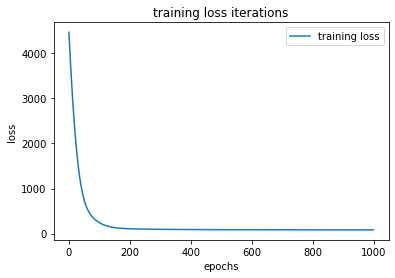

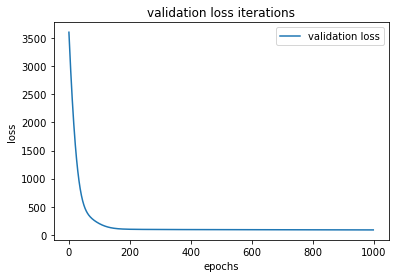

Test Evaluation Table 

+----+-------------+--------+
|    |   Predicted |   True |
|----+-------------+--------|
|  0 |   103.527   |    103 |
|  1 |    42.5903  |     65 |
|  2 |    81.574   |     95 |
|  3 |     2.43705 |      1 |
|  4 |    63.5302  |     80 |
|  5 |    98.6495  |     93 |
|  6 |    27.3662  |     28 |
|  7 |    74.6416  |     92 |
|  8 |    30.9689  |     26 |
|  9 |    99.0281  |     98 |
| 10 |    14.5919  |     18 |
| 11 |    99.114   |    101 |
| 12 |    98.8242  |     99 |
| 13 |    26.596   |     45 |
| 14 |    99.2115  |    102 |
| 15 |    84.9021  |     95 |
| 16 |    81.9374  |     82 |
| 17 |    11.8447  |     16 |
| 18 |    46.5078  |     49 |
| 19 |    18.1623  |     26 |
+----+-------------+--------+


In [14]:
training_results = train(model_00, criterion_00, train_loader, validation_loader, test_loader, optimizer_00, epochs = 1000)
plot_loss(training_results)

## ***DNN with One-hidden Layer (Simple Version)***

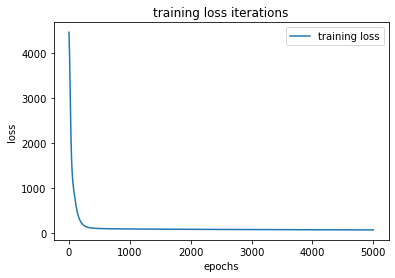

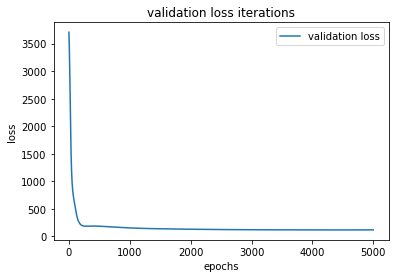

Test Evaluation Table 

+----+-------------+--------+
|    |   Predicted |   True |
|----+-------------+--------|
|  0 |    99.0158  |    103 |
|  1 |    37.4677  |     65 |
|  2 |    89.7076  |     95 |
|  3 |     8.68258 |      1 |
|  4 |    61.6555  |     80 |
|  5 |    95.8391  |     93 |
|  6 |    26.3411  |     28 |
|  7 |    72.5835  |     92 |
|  8 |    34.0574  |     26 |
|  9 |    97.9391  |     98 |
| 10 |    12.3569  |     18 |
| 11 |    96.5768  |    101 |
| 12 |    98.18    |     99 |
| 13 |    26.1872  |     45 |
| 14 |    96.0593  |    102 |
| 15 |    91.2534  |     95 |
| 16 |    84.0076  |     82 |
| 17 |    12.5345  |     16 |
| 18 |    47.0325  |     49 |
| 19 |    21.1344  |     26 |
+----+-------------+--------+


In [15]:
training_results = train(model_10, criterion_10, train_loader, validation_loader, test_loader, optimizer_10, epochs = 5000)
plot_loss(training_results)

## ***DNN with Two-hidden Layers (Simple Version)***

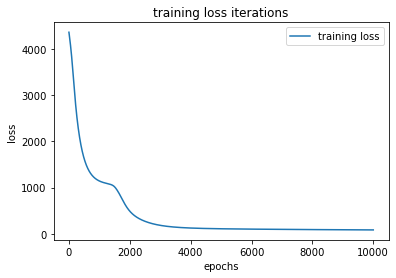

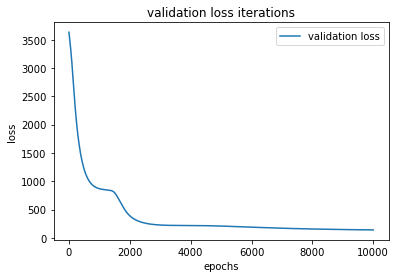

Test Evaluation Table 

+----+-------------+--------+
|    |   Predicted |   True |
|----+-------------+--------|
|  0 |     93.1816 |    103 |
|  1 |     35.3022 |     65 |
|  2 |     90.217  |     95 |
|  3 |     18.0318 |      1 |
|  4 |     60.9456 |     80 |
|  5 |     92.5921 |     93 |
|  6 |     23.6471 |     28 |
|  7 |     72.852  |     92 |
|  8 |     30.7592 |     26 |
|  9 |     92.9436 |     98 |
| 10 |     18.5701 |     18 |
| 11 |     92.4418 |    101 |
| 12 |     93.1737 |     99 |
| 13 |     25.8233 |     45 |
| 14 |     92.5609 |    102 |
| 15 |     91.6523 |     95 |
| 16 |     86.2783 |     82 |
| 17 |     18.8162 |     16 |
| 18 |     43.3236 |     49 |
| 19 |     21.5803 |     26 |
+----+-------------+--------+


In [16]:
training_results = train(model_20, criterion_20, train_loader, validation_loader, test_loader, optimizer_20, epochs = 10000)
plot_loss(training_results)

## ***DNN with Xavier Initilization (One-hidden Layer version)***

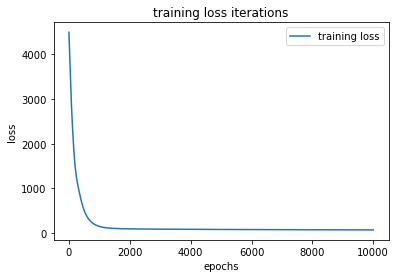

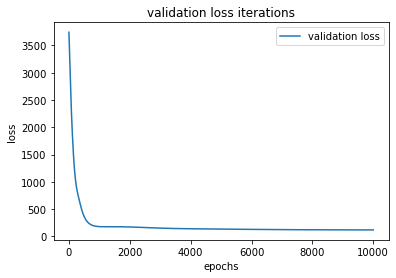

Test Evaluation Table 

+----+-------------+--------+
|    |   Predicted |   True |
|----+-------------+--------|
|  0 |     98.1241 |    103 |
|  1 |     36.3871 |     65 |
|  2 |     89.3297 |     95 |
|  3 |     10.7056 |      1 |
|  4 |     62.7379 |     80 |
|  5 |     95.6117 |     93 |
|  6 |     24.6718 |     28 |
|  7 |     73.6777 |     92 |
|  8 |     30.7121 |     26 |
|  9 |     97.3213 |     98 |
| 10 |     13.7293 |     18 |
| 11 |     96.572  |    101 |
| 12 |     97.6326 |     99 |
| 13 |     25.9468 |     45 |
| 14 |     95.7251 |    102 |
| 15 |     91.1304 |     95 |
| 16 |     85.1554 |     82 |
| 17 |     13.3245 |     16 |
| 18 |     46.1427 |     49 |
| 19 |     20.4686 |     26 |
+----+-------------+--------+


In [17]:
training_results = train(model_11, criterion_11, train_loader, validation_loader, test_loader, optimizer_11, epochs = 10000)
plot_loss(training_results)

## ***DNN with Xavier Initilization (Two-hidden Layers version)***

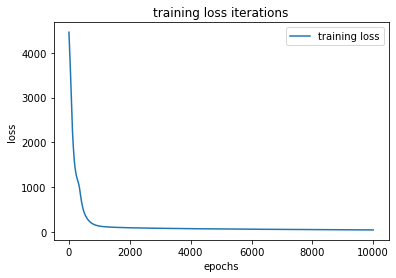

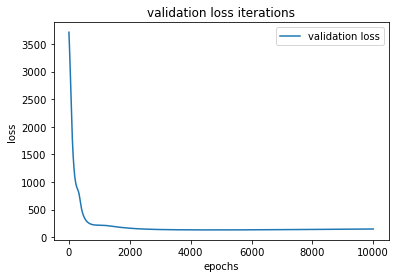

Test Evaluation Table 

+----+-------------+--------+
|    |   Predicted |   True |
|----+-------------+--------|
|  0 |     99.06   |    103 |
|  1 |     32.8867 |     65 |
|  2 |     91.057  |     95 |
|  3 |     12.6241 |      1 |
|  4 |     56.9083 |     80 |
|  5 |     97.3524 |     93 |
|  6 |     26.0152 |     28 |
|  7 |     86.4571 |     92 |
|  8 |     44.8908 |     26 |
|  9 |     98.0341 |     98 |
| 10 |     13.196  |     18 |
| 11 |    100.72   |    101 |
| 12 |     97.583  |     99 |
| 13 |     29.3421 |     45 |
| 14 |     97.4798 |    102 |
| 15 |     81.7958 |     95 |
| 16 |     87.0629 |     82 |
| 17 |     13.6429 |     16 |
| 18 |     36.715  |     49 |
| 19 |     23.0844 |     26 |
+----+-------------+--------+


In [18]:
training_results = train(model_21, criterion_21, train_loader, validation_loader, test_loader, optimizer_21, epochs = 10000)
plot_loss(training_results)

## ***DNN with Uniform Initialization (One-hidden Layer version)***

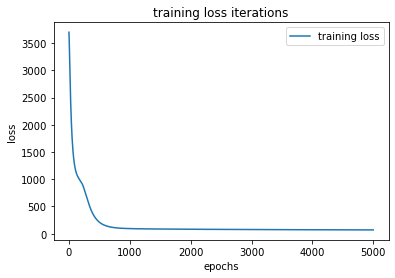

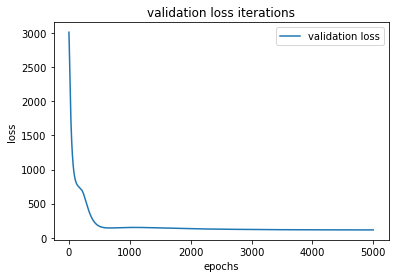

Test Evaluation Table 

+----+-------------+--------+
|    |   Predicted |   True |
|----+-------------+--------|
|  0 |    98.0381  |    103 |
|  1 |    38.4827  |     65 |
|  2 |    89.2786  |     95 |
|  3 |     9.45065 |      1 |
|  4 |    62.3813  |     80 |
|  5 |    95.7638  |     93 |
|  6 |    25.2267  |     28 |
|  7 |    73.6543  |     92 |
|  8 |    32.1519  |     26 |
|  9 |    97.0735  |     98 |
| 10 |    13.0164  |     18 |
| 11 |    94.9592  |    101 |
| 12 |    97.2744  |     99 |
| 13 |    25.3306  |     45 |
| 14 |    95.9068  |    102 |
| 15 |    90.9706  |     95 |
| 16 |    85.5917  |     82 |
| 17 |    12.7429  |     16 |
| 18 |    46.329   |     49 |
| 19 |    20.1009  |     26 |
+----+-------------+--------+


In [19]:
training_results = train(model_12, criterion_12, train_loader, validation_loader, test_loader, optimizer_12, epochs = 5000)
plot_loss(training_results)

## ***DNN with Uniform Initialization (Two-hidden Layers version)***

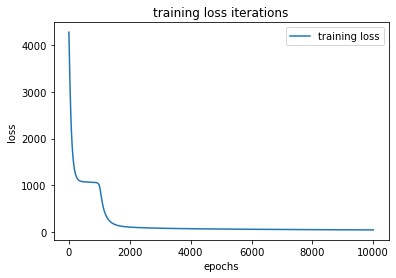

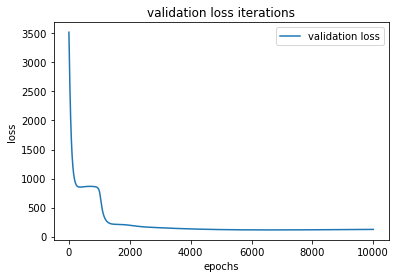

Test Evaluation Table 

+----+-------------+--------+
|    |   Predicted |   True |
|----+-------------+--------|
|  0 |     99.4313 |    103 |
|  1 |     32.4597 |     65 |
|  2 |     89.2565 |     95 |
|  3 |     10.9686 |      1 |
|  4 |     61.1658 |     80 |
|  5 |     96.4987 |     93 |
|  6 |     26.9794 |     28 |
|  7 |     74.2135 |     92 |
|  8 |     45.383  |     26 |
|  9 |     98.4497 |     98 |
| 10 |     13.1429 |     18 |
| 11 |    100.953  |    101 |
| 12 |     98.7613 |     99 |
| 13 |     25.3475 |     45 |
| 14 |     96.4847 |    102 |
| 15 |     88.8284 |     95 |
| 16 |     82.2244 |     82 |
| 17 |     12.5882 |     16 |
| 18 |     39.9969 |     49 |
| 19 |     21.6232 |     26 |
+----+-------------+--------+


In [20]:
training_results = train(model_22, criterion_22, train_loader, validation_loader, test_loader, optimizer_22, epochs = 10000)
plot_loss(training_results)

## ***DNN with Two Hidden Layers (Batch Normalization)***

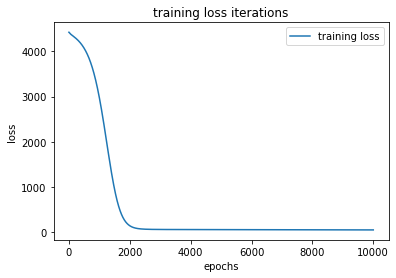

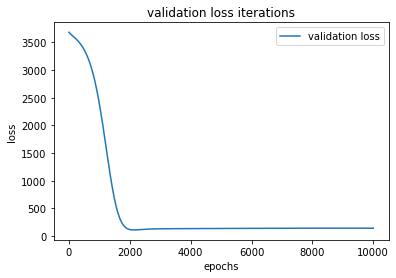

Test Evaluation Table 

+----+-------------+--------+
|    |   Predicted |   True |
|----+-------------+--------|
|  0 |    94.3428  |    103 |
|  1 |    38.891   |     65 |
|  2 |    86.5717  |     95 |
|  3 |    -3.25647 |      1 |
|  4 |    56.7219  |     80 |
|  5 |    93.3557  |     93 |
|  6 |    30.9383  |     28 |
|  7 |    66.9512  |     92 |
|  8 |    50.8792  |     26 |
|  9 |    92.9891  |     98 |
| 10 |    13.8735  |     18 |
| 11 |    93.5829  |    101 |
| 12 |    92.0248  |     99 |
| 13 |    24.7937  |     45 |
| 14 |    92.1446  |    102 |
| 15 |    83.0628  |     95 |
| 16 |    78.06    |     82 |
| 17 |     7.84152 |     16 |
| 18 |    46.0903  |     49 |
| 19 |    21.2402  |     26 |
+----+-------------+--------+


In [21]:
training_results = train(model_23, criterion_23, train_loader, validation_loader, test_loader, optimizer_23, epochs = 10000)
plot_loss(training_results)

# <font color = 'purple'>**$$ Conclusion\;\; and\;\; Observations $$**</font>

In this project, I have investigated the ranking of the IMO countries in 2020. I have used ***Deep Neural Networks*** to train the model on predicting the rank of the country on that list. As I have mentioned above, there exist many reasons for such ordering of countries in the competition. One of the reason is it shows the relative comparison of country's mathematical education with other ones, so it can be a good reason and justification of the spent money on education for country officials. Moreover, it can serve as a motivation for students studying at high school to excel their education to be compatible with other best countries students.  Thus, it has a practical usage and useful in many ways to consider the ranking of the country every year. From my personal experience, I can say it has a huge impact on the students who love mathematical olympiads and participate regularly on such events. The progress on that list can give a sort of confidence and rise self-esteem of the team. Therefore, I believe it has to be considered and should play an important role in determining the progress rate of the country in general. 

After implementing the data, we have cleaned and converted some data to integer and float type to use in our analysis. Next, we have applied ***max-min normalization*** since our data is small and some of them differ from other ones significantly on the scale. Also, it has been used to overcome quick overfitting and variation in inputs. In Deep Neural Networks we would split the data into training, validation and test split, the latter ones used to test the model on untrained datasets. Thus, the splitting process is essential, and it should be done randomly choosing the indexes of datasets. In the selection of indexes, I have used the random sampling and split the indexes according to 70/15/15 principle. The reason for using this principle is because of our data, it has only 135 observations, and to test the model properly, I wanted to have enough validation and test data. Consequently, the found indexes used to find the train, validation and test data from the original dataset. After that, I have created three dataset classes and custom modules. Custom modules for linear regression, Shallow Neural network, Deeper Neural Network, with different Initialization and Batch Normalization. The train function trained the model and saved losses in each epoch for the training and validation, also it evaluated the test data. Plotting function ploted the losses vs epoch and printed out the test evaluation vs real test data.  All hyperparameters were tuned using validation split. 

As we can see from the linear regression (without hidden layers), the model behaves well in training and validation datasets as their losses are decreasing for each epoch. The values of evaluation on the test split are pretty good compared with real ones. The same good models have been obtained in Shallow Neural Network with Default Initialization, also with Xavier and Uniform Initialization. To avoid the overfitting, I have increased the epoch numbers and decreased the learning rate, additionally I have used the momentum and dropout methods in models to decrease an overfitting. So, it worked well almost for all models, especially for models with Two-Hidden Layers. In Deeper Neural Networks, I have used different initialization methods and lastly batch normalization method. I think batch normalization worked pretty well on both training and validation datasets, but evaluation of test data seemed to be less accurate than the linear regression model. So, it showed to me that the complex models are not always good compared with simpler ones. Overall, all models are good and not overfit the data.  If we want to answer which one is the best, we need to run additionally some code which would show the relative efficiency (loss) of each method compared with other ones. The project achieved its goal and produced trustable and trained models for each linear regression, shallow neural network and deeper neural network. Almost all the knowledge from the Coursera course has been applied in Project 2 and it showed that we can obtain accurate and good models even if our sample is small. 